# Descrizione dei sensori utilizzati

## sonda di tensione (voltmetro)
+ **identificatione del sensore** Experiment > Set Up Sensors > Show all interfaces 
(canale connsesso)> Choose sensor > Raw Voltage (scegliere precisione) 

+ **Azzeramento** Experiment > Zero

+ **calibrazione** Experiment > Sensor info 
Calibration > keep

## sonda di corrente (amperometro)
 corrente massima | precisione |resistore
--- | --- | ---
100 mA | 50 uA | 100 Ohm 
20 A | 10 mA | 0.5 Ohm 

+ **aazzeramento** Experiment > zero
+ **misura di corrente** Data > New Calculated Column
Equation < "Potential 1"/100 --> Variables < Potential 1

## Sensore di carica
Sensore | impedenza | Capazità | costante di tempo
--- | --- | --- | ---
Vernier CRG-BTA | >1 MOhm | 10 nF | 0.1 s

Potenziale di Fondo scala  [V] | carica [nC]
--- | ---
0.5 | 5
2 | 20
10 | 100

**NB** errore sistematico : la misura corretta sarebbe $$ Q = (C0+C)V $$


## Sensore di campo magnetico
Vernier MG-BTA (Sonda Hall)

Fondo scala | precisione
--- | ---
0.3 mT | 0.2 uT
6.4 mT | 4 uT


# capacità del condensatore piano

+ il condensatore viene caricato con un alimenttore in CC 60 V, 3 A
+ a condensatore carico, si sposta il contatto in B e il sensore di carica misura la ddp ai capi di C0

## procedimento
1. si fa partire l'acquisizione
2. deviatore in posizione A
3. impostare differenza di potenziale nell'alimentatore
4. scaricare il sensore di carica (interruttore)
5. chiudere in B
6. aspetttare che il sensore sia carico prima di fermare l'aquisizione

## analisi misura
+ **media ** Analyze > statistics > valore medio

# Elaborazione Dati 

## Seconda parte

descrizione

In [23]:
import numpy as np
import pandas as pd

#data2 = open('data2parte.csv','r')
#dalla prima parte
d0 = 1.4

df=pd.read_csv('data2parte.csv', header=0)

# voltaggio (V), passo (mm/giro)
volt, passo = 60, 1.5

# spostamento relativo d - d0 (mm)
spos_rel = df.values[:,0]*passo

# spostamento assoluto d (mm)
spos =  spos_rel + d0

# carica q (nC)
q = df.values[:,1]-df.values[:,2]

new = {
    'giri': df.values[:,0],
    'd': spos,
    'd-d0': spos_rel,
    'segnale': df.values[:,1],
    'fondo': df.values[:,2],
    'q': q
}
pd.DataFrame(data=new)
    

,d,d-d0,fondo,giri,q,segnale
0,1.40,0.00,0.01,0.0,19.31,19.32
1,2.15,0.75,0.00,0.5,19.31,19.31
2,2.90,1.50,0.01,1.0,15.31,15.32
3,3.65,2.25,0.00,1.5,11.10,11.10
4,4.40,3.00,0.01,2.0,8.96,8.97
5,5.15,3.75,0.01,2.5,7.64,7.65
6,5.90,4.50,0.00,3.0,6.69,6.69
7,6.65,5.25,0.00,3.5,6.00,6.00
8,7.40,6.00,0.00,4.0,5.43,5.43
9,8.15,6.75,0.00,4.5,5.01,5.01


## fit della funzione 
$$ Q(d) = \epsilon_0 \frac{ A}{ d+d_0} V + B $$

in cui $B$ è una costante di integrazione per compensare errori sistemici 

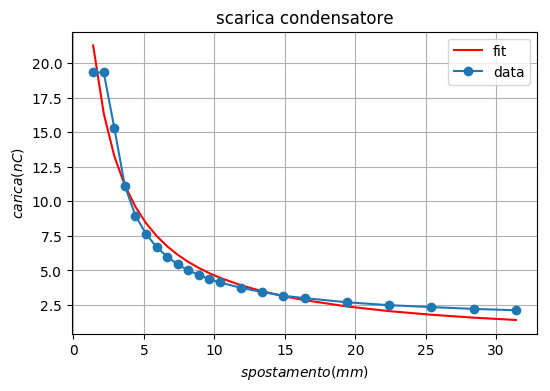

In [24]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Q(x,eo, do, B ):
    # dati Area = 0.049, V= 60
    return eo*60*0.049/(x+do) + B


popt, pcov = curve_fit(Q, spos, q)

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)

plt.plot(spos, Q(spos, *popt), 'r-', label='fit')
plt.plot(spos, q, marker = 'o', label='data')

plt.title('scarica condensatore')
ax.set_ylabel('$carica (nC)$')
ax.set_xlabel('$spostamento (mm)$')
plt.legend()
plt.grid()
plt.show()

# parametri di ottimizzazione
print('eo, do, B',popt)
print('covariance',pcov)

## stima in

il valore è chiaramenteanomalo

## distanza minima

## termine di spostamento



# Bibliografia
+ Fisica in laborario Esculapio

In [25]:
# informazioni sul sistema utilizzato